PZ.U11 - Testy akustyczne
https://pzawistowski.github.io/PSZT_UM19Z

In [ ]:
# Attribute Information:
# This problem has the following inputs:
# 1. Frequency, in Hertzs. [Hz]
# 2. Angle of attack, in degrees. [deg]
# 3. Chord length, in meters. [m]
# 4. Free-stream velocity, in meters per second. [m/s]
# 5. Suction side displacement thickness, in meters. [m]

# The only output is:
# 6. Scaled sound pressure level, in decibels. [dB]

In [7]:
import pandas as pd

# names  - odnosi sie do nazw kolumn
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
nazwy_kolumn = ['freguency_Hz','angle_deg','length_m','velocity_m_s','thickness_m','pressure_dB']
df = pd.read_csv(url, sep ='\t', header = None, names = nazwy_kolumn)
df.head()

,freguency_Hz,angle_deg,length_m,velocity_m_s,thickness_m,pressure_dB
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
df.describe()

,freguency_Hz,angle_deg,length_m,velocity_m_s,thickness_m,pressure_dB
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [9]:
#data processing
df_pro = df.iloc[:,[0,-1]].copy()
print(df_pro)

      freguency_Hz  pressure_dB
0              800      126.201
1             1000      125.201
2             1250      125.951
3             1600      127.591
4             2000      127.461
...            ...          ...
1498          2500      110.264
1499          3150      109.254
1500          4000      106.604
1501          5000      106.224
1502          6300      104.204

[1503 rows x 2 columns]


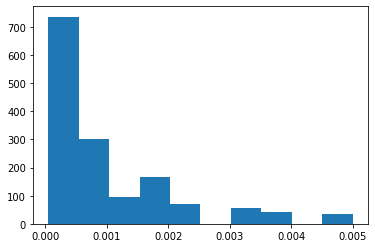

In [10]:
import matplotlib.pyplot as plt
df_freq = df_pro.iloc[:,0].copy()
df_T = 1 / df_freq

plt.hist(df_T.to_numpy())
plt.show()

<class 'pandas.core.series.Series'>
0       4.169654e+12
1       3.312074e+12
2       3.936407e+12
3       5.742487e+12
4       5.573141e+12
            ...     
1498    1.062674e+11
1499    8.421705e+10
1500    4.575094e+10
1501    4.191795e+10
1502    2.632692e+10
Name: pressure_dB, Length: 1503, dtype: float64


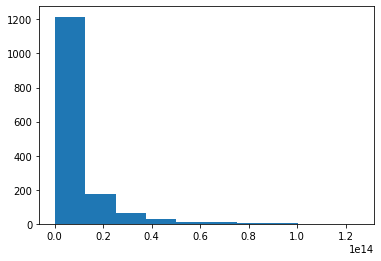

In [11]:
import numpy as np

pres =  df_pro.iloc[:,1].copy()
pres_p = np.power(10,(pres/10)).copy()
print(type(pres_p))
print(pres_p)
plt.hist(pres_p)
plt.show()

In [12]:
df_2 = df.copy()

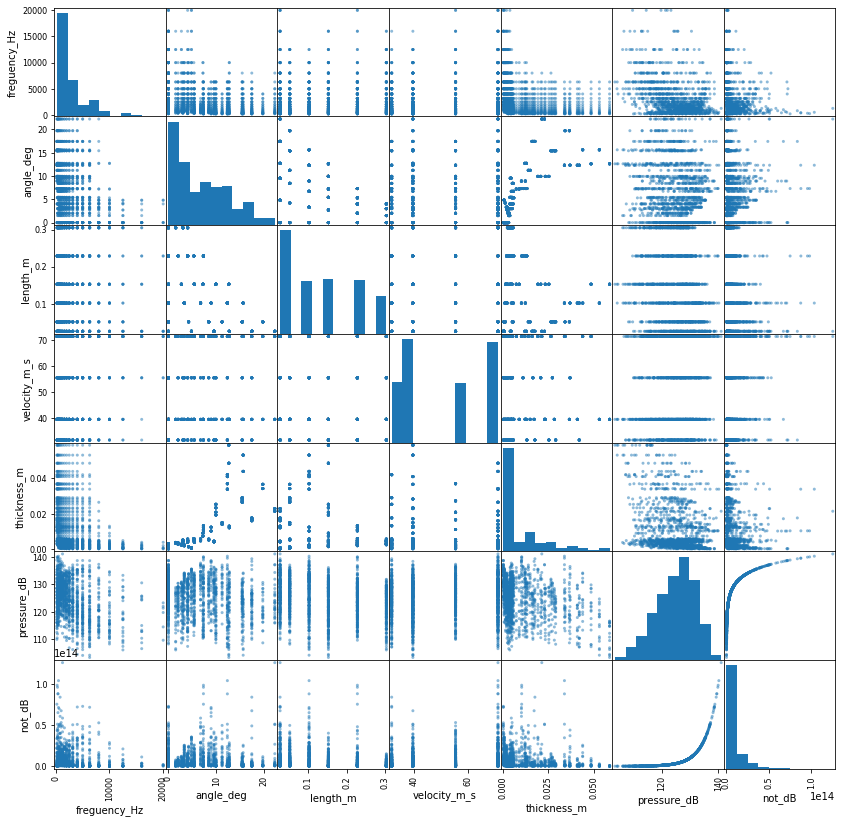

In [13]:
df_2['not_dB'] = pres_p
r=14
pd.plotting.scatter_matrix(df_2, figsize=(r, r));

In [14]:
df_2['sqrt_db'] = np.sqrt(df_2.iloc[:,-1])

df_2.corr()

,freguency_Hz,angle_deg,length_m,velocity_m_s,thickness_m,pressure_dB,not_dB,sqrt_db
freguency_Hz,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711,-0.166047,-0.271833
angle_deg,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108,-0.038221,-0.103517
length_m,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162,-0.215602,-0.250251
velocity_m_s,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103,0.141223,0.142131
thickness_m,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670,-0.126180,-0.219651
pressure_dB,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000,0.713990,0.903066
not_dB,-0.166047,-0.038221,-0.215602,0.141223,-0.126180,0.713990,1.000000,0.932382
sqrt_db,-0.271833,-0.103517,-0.250251,0.142131,-0.219651,0.903066,0.932382,1.000000


In [15]:
df.isnull().sum()

freguency_Hz    0
angle_deg       0
length_m        0
velocity_m_s    0
thickness_m     0
pressure_dB     0
dtype: int64

In [16]:
df.shape

(1503, 6)

In [17]:
df.corr()

,freguency_Hz,angle_deg,length_m,velocity_m_s,thickness_m,pressure_dB
freguency_Hz,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle_deg,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
length_m,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
velocity_m_s,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
thickness_m,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
pressure_dB,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


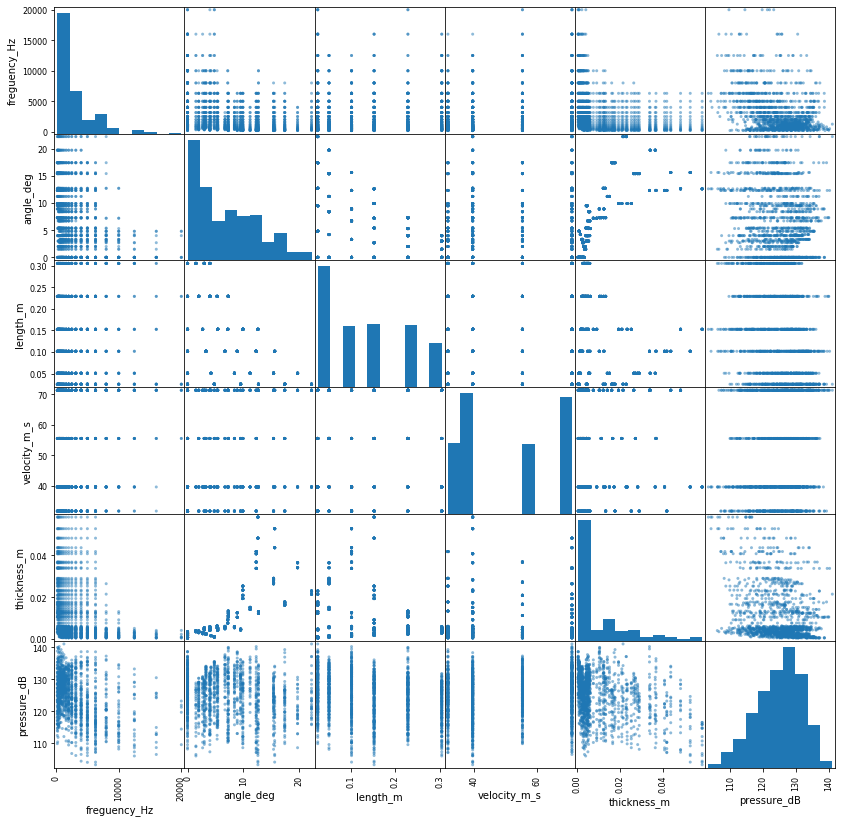

In [18]:
r=14
pd.plotting.scatter_matrix(df, figsize=(r, r));

In [19]:
 # Use only 5 features
data_X = df.iloc[:,0:5] 
data_X

,freguency_Hz,angle_deg,length_m,velocity_m_s,thickness_m
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [20]:
data_Y = df.iloc[:,5] 
data_Y 

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: pressure_dB, Length: 1503, dtype: float64

In [21]:
# Split the data into training and testing sets
from sklearn import model_selection
 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data_X, data_Y, test_size=0.2)

### Normalizacja - może pomóc

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


scaler = StandardScaler()

scaler.fit(Y_train.values.reshape(-1, 1))
Y_train = scaler.transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = scaler.transform(Y_test.values.reshape(-1, 1)).ravel()

# linear regression

In [157]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

In [158]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-0.58878528 -0.33729467 -0.454374    0.22592786 -0.28970034]
Intercept: 
 -4.1323541769843636e-17


In [160]:
import numpy as np
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))

Residual sum of squares: 0.41


In [161]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Variance score: 0.57


### MLP 

In [219]:
from sklearn import neural_network

model_MLP = neural_network.MLPRegressor(hidden_layer_sizes = (20,15,10,5), max_iter = 200, learning_rate_init=0.01)
model_MLP.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [220]:
# coefficient of determination R^2 : 1 is perfect prediction
print('Variance score: %.2f' % model_MLP.score(X_test, Y_test))

Variance score: 0.81


In [221]:
import numpy as np
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((model_MLP.predict(X_test) - Y_test) ** 2))

Residual sum of squares: 0.18


In [166]:
# vars(model_MLP) # list of attributes 

print('Values of loss function: \n', model_MLP.loss_)
print('No improvement count: \n',model_MLP._no_improvement_count)
print('Values of "best-loss" function: \n',model_MLP.best_loss_)

Values of loss function: 
 0.06270642917482518
No improvement count: 
 11
Values of "best-loss" function: 
 0.05910074106990636


### Inny lepszy model żeby poakzać ze sie da lepiej

In [139]:
def train_and_test_model(model, X_train, X_test, Y_train, Y_test, **kwargs):
    model.fit(X_train, Y_train)
    print(f"test r^2: {model.score(X_test, Y_test)}")

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
model = RandomForestRegressor()

In [142]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
model.score(X_test, Y_test)

0.9167644636386906

### Regresja liniowa z regularyzacją

In [124]:
from sklearn.linear_model import ElasticNet

In [125]:
train_and_test_model(ElasticNet(), X_train, X_test, Y_train, Y_test)

test r^2: 0.16432344130803456


In [126]:
from sklearn.linear_model import Ridge

In [127]:
train_and_test_model(Ridge(), X_train, X_test, Y_train, Y_test)

test r^2: 0.45713881636036047


In [128]:
from sklearn.linear_model import Lasso

In [129]:
train_and_test_model(Lasso(), X_train, X_test, Y_train, Y_test)

test r^2: 0.16574665074389694


# Kroswalidacja razem z random searchem (random search jest raczej lepszy niż grid search)

In [300]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
n_iter_search = 200

### MLP

In [315]:
model = neural_network.MLPRegressor(hidden_layer_sizes = (20,15,10,5))

In [316]:
neural_network.MLPRegressor(early_stopping=True)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [317]:
grid_params_random = {'learning_rate_init': uniform(0.0001, 0.1),
                      'max_iter': sp_randint(50, 5000),
                      'momentum': uniform(0.1, 0.9),
                      'alpha': uniform(0.00001, 0.1),
                      'activation': ["relu", "logistic"],
                      'hidden_layer_sizes': [(15, 10, 5), (25, 20, 15, 10, 5), (20, 15, 10, 5)]
                     }

In [318]:
reg = RandomizedSearchCV(model,
                         grid_params_random,
                         scoring="r2",
                         n_iter=n_iter_search,
                         cv=5,
                         n_jobs=-1,
                         verbose=10)

In [319]:
reg.fit(X_train, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0857s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1086s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   11.0s
[Parallel(n_jo

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(20, 15, 10, 5),
                                          learning_rate='constant',
                                          learning_rate_init=0.001,
                                          max_fun=15000, max_iter=200,
                                          momentum=0.9, n_iter_no_change=10,
                                          nesterovs_momentum=True, power_t=0.5,
                                          r...
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb02a35ffd0>,
                                        'max_iter': 

In [320]:
reg.best_estimator_

MLPRegressor(activation='relu', alpha=0.04425662210533812, batch_size='auto',
             beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 15, 10, 5), learning_rate='constant',
             learning_rate_init=0.004905235020280497, max_fun=15000,
             max_iter=3537, momentum=0.46487949250859173, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [321]:
reg.best_score_

0.9129862391067987

In [322]:
reg.score(X_test, Y_test)

0.8437842896346492

### Elasticnet

In [308]:
from sklearn.linear_model import ElasticNet

In [309]:
model = ElasticNet()

In [310]:
grid_params_random = {'l1_ratio': uniform(0.1, 0.9),
                      'max_iter': sp_randint(50, 5000),
                      'tol': uniform(0.00001, 0.1)
                     }

In [311]:
reg = RandomizedSearchCV(model,
                         grid_params_random,
                         scoring="r2",
                         n_iter=n_iter_search,
                         cv=5,
                         n_jobs=-1,
                         verbose=10)
reg.fit(X_train, Y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0045s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0170s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0161s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0203s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0315s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0501s.) Setting batch_size=64.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb02a3ea050>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb02a399210>,
                                        'tol': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb02a3996d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   re

In [312]:
print(reg.best_score_, reg.score(X_test, Y_test))

0.2183126946803106 0.22764450934909986
